In [6]:
import pandas as pd

file_path = 'data.csv'
data = pd.read_csv(file_path)
data.head()


,url,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,https://www.netflix.com/title/60000724,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2313221.0,MX
1,https://www.netflix.com/title/1154386,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516523.0,"AT, CH, DE"
2,https://www.netflix.com/title/60031236,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1220488.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,https://www.netflix.com/title/70021659,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211314.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BE, BG..."
4,https://www.netflix.com/title/1080395,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443310.0,"AU, BA, BE, BG, CZ, HR, HU, MD, ME, MK, NZ, PL..."


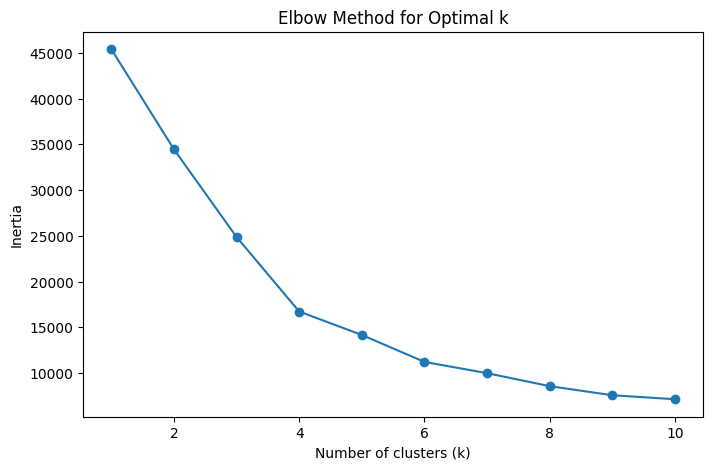

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_data = data[['releaseYear', 'imdbAverageRating', 'imdbNumVotes']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


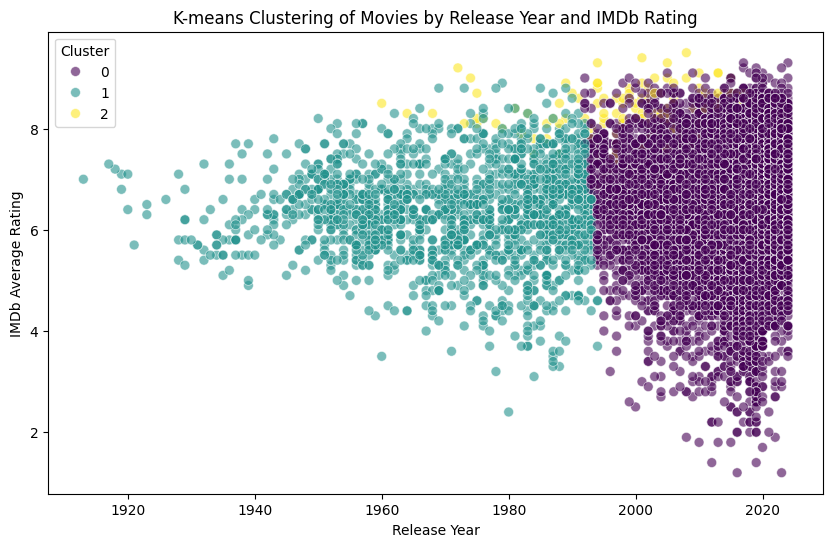

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data[['releaseYear', 'imdbAverageRating', 'imdbNumVotes']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=3, random_state=0)
numeric_data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=numeric_data['releaseYear'], y=numeric_data['imdbAverageRating'],
                hue=numeric_data['Cluster'], palette='viridis', s=50, alpha=0.6)
plt.title("K-means Clustering of Movies by Release Year and IMDb Rating")
plt.xlabel("Release Year")
plt.ylabel("IMDb Average Rating")
plt.legend(title="Cluster")
plt.show()